<a href="https://colab.research.google.com/github/mehraanjali/StockMarket_prediction_using_LSTM/blob/main/Stock_Market_project_150.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Collection**

*the pandas_datareader library is to fetch financial data, but you have to provided your API key or specific data source. To use pandas_datareader for retrieving financial data, you need to specify a data source and, in some cases, an API key or token.*

In [ ]:
import pandas_datareader as pdr
key="Place your key here"

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

<ipython-input-46-08157bf6935e>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [ ]:
#Saving it to a csv file
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd

df=pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-10-08 00:00:00+00:00,223.77,224.80,220.20,222.21,29663923,53.574084,53.820682,52.719369,53.200595,118655692,0.0,1.0
1,AAPL,2018-10-09 00:00:00+00:00,226.87,227.27,222.25,223.64,26891029,54.316273,54.412039,53.210171,53.542960,107564116,0.0,1.0
2,AAPL,2018-10-10 00:00:00+00:00,216.36,226.35,216.05,225.46,41990554,51.800012,54.191776,51.725793,53.978696,167962216,0.0,1.0
3,AAPL,2018-10-11 00:00:00+00:00,214.45,219.50,212.32,214.52,53124392,51.342728,52.551778,50.832772,51.359487,212497568,0.0,1.0
4,AAPL,2018-10-12 00:00:00+00:00,222.11,222.88,216.84,220.42,40337851,53.176653,53.361003,51.914932,52.772040,161351404,0.0,1.0


**We only need "Close column"**

In [ ]:
df1=df.reset_index()['close']
df1

0       223.77
1       226.87
2       216.36
3       214.45
4       222.11
         ...  
1252    171.21
1253    173.75
1254    172.40
1255    173.66
1256    174.91
Name: close, Length: 1257, dtype: float64

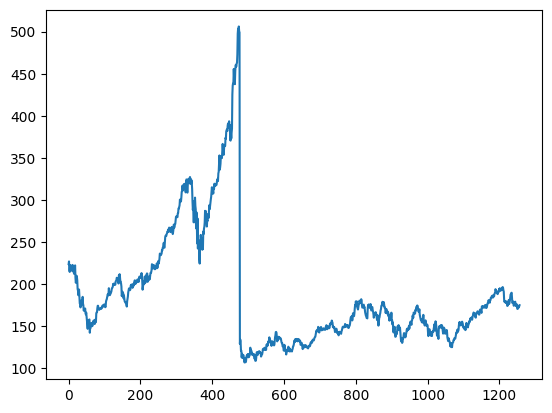

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
#Applying minmax scalar as LSTM is sensitive to the scale of the data.

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

*The shape -1, 1 is used in the context of reshaping the data for input to the MinMaxScaler in scikit-learn.*

**Reshaping with -1, 1:**

*The -1 in the reshape(-1, 1) method is a placeholder for an unknown dimension. When you reshape your data this way, you're essentially telling NumPy to infer the number of rows necessary to maintain the number of columns as 1. This is often used when you have a 1D array (a single column of data) and you want to convert it into a 2D array with one column. This format is expected by many machine learning libraries, including scikit-learn.*

In [ ]:
print(df1)

[[0.29287414]
 [0.3006387 ]
 [0.27431434]
 ...
 [0.16420789]
 [0.16736381]
 [0.17049468]]


In [ ]:
#splitting dataset into train and test split

training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(817, 440)

In [ ]:
train_data

array([[2.92874139e-01],
       [3.00638698e-01],
       [2.74314339e-01],
       [2.69530369e-01],
       [2.88716343e-01],
       [2.76819036e-01],
       [2.88816531e-01],
       [2.86412023e-01],
       [2.73462743e-01],
       [2.81703193e-01],
       [2.85059487e-01],
       [2.90269255e-01],
       [2.71133375e-01],
       [2.82930495e-01],
       [2.74164058e-01],
       [2.63994991e-01],
       [2.66649969e-01],
       [2.80576080e-01],
       [2.88991860e-01],
       [2.52072636e-01],
       [2.37319975e-01],
       [2.42780213e-01],
       [2.58259236e-01],
       [2.54602379e-01],
       [2.44533500e-01],
       [2.18735128e-01],
       [2.13876018e-01],
       [2.00275517e-01],
       [2.11822167e-01],
       [2.17132123e-01],
       [1.97921102e-01],
       [1.75679399e-01],
       [1.75178460e-01],
       [1.63932373e-01],
       [1.69768316e-01],
       [1.68816531e-01],
       [1.85597996e-01],
       [1.82116468e-01],
       [1.79686913e-01],
       [1.95316218e-01],


In [ ]:
import numpy

# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [ ]:
time_step = 150
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

For example if we have train_data as (1,2,3,4,5,6,7,8,9,10) and the time_step as 2

the output will be :

X_train   Y_train
[1, 2]    3
[2, 3]    4
[3, 4]    5
[4, 5]    6
[5, 6]    7
[6, 7]    8
[7, 8]    9
[8, 9]    10

i will run from 0 to 7 which is from 1 to 8

In [ ]:
print(X_train.shape), print(y_train.shape)

(666, 150)
(666,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(289, 150)
(289,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

*To reshape it from 2D to 3D - X_train.reshape(715,100,1) where one is the number of features (that is one -> one timestep only)*

In [ ]:
print(X_train.shape), print(X_test.shape)

(666, 150, 1)
(289, 150, 1)


(None, None)

In [ ]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 150, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 150, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Epoch 1/150
11/11 [==============================] - 15s 858ms/step - loss: 0.0455 - val_loss: 0.0020
Epoch 2/150
11/11 [==============================] - 7s 633ms/step - loss: 0.0155 - val_loss: 0.0026
Epoch 3/150
11/11 [==============================] - 9s 856ms/step - loss: 0.0103 - val_loss: 4.6474e-04
Epoch 4/150
11/11 [==============================] - 5s 479ms/step - loss: 0.0094 - val_loss: 4.4820e-04
Epoch 5/150
11/11 [==============================] - 3s 305ms/step - loss: 0.0083 - val_loss: 7.5278e-04
Epoch 6/150
11/11 [==============================] - 5s 459ms/step - loss: 0.0071 - val_loss: 0.0011
Epoch 7/150
11/11 [==============================] - 3s 301ms/step - loss: 0.0071 - val_loss: 2.9309e-04
Epoch 8/150
11/11 [==============================] - 3s 307ms/step - loss: 0.0067 - val_loss: 0.0012
Epoch 9/150
11/11 [==============================] - 3s 315ms/step - loss: 0.0057 - val_loss: 9.3098e-04
Epoch 10/150
11/11 [==============================] - 5s 447ms/step - 

**Save model weights**

In [ ]:
model.save_weights('/content/drive/MyDrive/Object Detection Project SSD files/Model/weights/stockmarket_model_weights.ckpt')

**Load model weights**

In [ ]:
model.load_weights('/content/drive/MyDrive/Object Detection Project SSD files/Model/weights/stockmarket_model_weights.ckpt')

**Prediction for Train_Data**

In [ ]:
#Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

10/10 [==============================] - 1s 59ms/step


*It is used to transform the predicted values, which are likely in a scaled or normalized form, back to their original scale.*

**scaler.inverse_transform()** :* takes the predicted values from your dataset, which have been scaled or normalized, and applies the inverse transformation to bring them back to their original scale. This is important because you want to compare the model's predictions to the actual values in the original data space.*

In [ ]:
train_predict.shape, test_predict.shape, y_train.shape, ytest.shape

((666, 1), (289, 1), (666,), (289,))

In [ ]:
#Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

y_train = y_train.reshape(-1, 1)
ytest = ytest.reshape(-1, 1)

y_train = scaler.inverse_transform(y_train)
ytest = scaler.inverse_transform(ytest)

In [ ]:
train_predict.shape, test_predict.shape, y_train.shape, ytest.shape

((666, 1), (289, 1), (666, 1), (289, 1))

In [ ]:
train_predict[0:5]

array([[198.42682],
       [195.75868],
       [193.54102],
       [191.71548],
       [189.78925]], dtype=float32)

In [ ]:
y_train[0:5]

array([[190.92],
       [190.08],
       [189.  ],
       [183.09],
       [186.6 ]])

In [ ]:
test_predict[0:5]

array([[163.54764],
       [164.47589],
       [165.57816],
       [166.83002],
       [168.07382]], dtype=float32)

In [ ]:
ytest[0:5]

array([[168.49],
       [172.1 ],
       [173.19],
       [173.03],
       [174.55]])

*Root Mean Squared Error, is a commonly used performance metric in regression and time series forecasting tasks.*

**RMSE = sqrt((1/n) * Σ(actual_i - predicted_i)^2)**

In [ ]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

11.728974615551126

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

4.835621383797855

**look_back**
*is a variable set to 100. This value represents how far back in the time series you want to start plotting the training predictions.*

**trainPredictPlot**
*is created as an empty numpy array with the same shape as the original data df1. It's filled with NaN values initially.*

*The code then populates the trainPredictPlot array with the predictions made on the training data (train_predict) but shifted forward by look_back time steps. This is done so that the predictions align with the original data for visualization.*

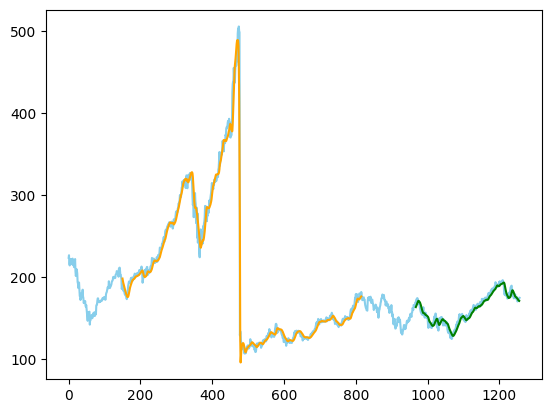

In [ ]:
# Plotting

# shift train predictions for plotting
look_back=150

trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#look_back is 100. len(train_predict) is 715.
#So, trainPredictPlot array starting from index 100 to 815 with the values from train_predict.

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
#len(train_predict) is 715. look_back is 100. So, len(train_predict) + look_back * 2 + 1 is 916.
#df1 is 1256 so len(df1) - 1, which is 1255, so the test predictions starting from index 916 and ending at index 1255

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label ='Original Data', color='skyblue')
plt.plot(trainPredictPlot, label='Training Predictions', color='orange')
plt.plot(testPredictPlot, label='Test Predictions', color='green')
plt.show()

**Prediction for Test_Data**

In [ ]:
len(test_data), len(train_data)

(440, 817)

*Taking the previous 100 days data to predict the test data's value*

In [ ]:
x_input=test_data[290:].reshape(1,-1)
x_input.shape

(1, 150)

*Now converting it into a list*

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.11068252974326859,
 0.11769567939887288,
 0.11211020663744514,
 0.11529117094552283,
 0.1095804633688165,
 0.10434564809016905,
 0.10927989981214775,
 0.11458985597996241,
 0.11559173450219157,
 0.12275516593613017,
 0.1206261740763932,
 0.12663744520976827,
 0.13134627426424544,
 0.12771446462116465,
 0.13046963055729488,
 0.13377582968065116,
 0.12884157795867246,
 0.12726361928616153,
 0.13507827175954912,
 0.13906073888541015,
 0.1454226675015654,
 0.14860363180964303,
 0.14725109580463364,
 0.14256731371321218,
 0.14482154038822787,
 0.13823418910457103,
 0.13515341264871633,
 0.1334001252348152,
 0.14707576706324355,
 0.14619912335629304,
 0.14624921728240442,
 0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584220411,
 0.15716969317470253,
 0.1545397620538509,
 0.15180964308077638,
 0.1476518472135253,
 0.16713838447088286,
 0.1669630557294

In [ ]:
# demonstrate prediction for next 100 days
from numpy import array

lst_output=[]
n_steps=150
i=0
while(i<100):

    if(len(temp_input)>150):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.16159245]
151
1 day input [0.11769568 0.11211021 0.11529117 0.10958046 0.10434565 0.1092799
 0.11458986 0.11559173 0.12275517 0.12062617 0.12663745 0.13134627
 0.12771446 0.13046963 0.13377583 0.12884158 0.12726362 0.13507827
 0.13906074 0.14542267 0.14860363 0.1472511  0.14256731 0.14482154
 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912 0.14624922
 0.14935504 0.15226049 0.14980589 0.14572323 0.14649969 0.14259236
 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964
 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923
 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085
 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809
 0.17635567 0.183469   0.18562304 0.18219161 0.18126487 0.17778334
 0.18467126 0.18564809 0.19273638 0.19153413 0.19313713 0.19829681
 0.19556669 0.19579211 0.19316218 0.20077646 0.19997495 0.19644333
 0.20343143 0.20641202 0.20726362 0.21823419 0.2144521  0.21162179
 0.21282405 0.20999374 0.20480902 0

In [ ]:
day_new=np.arange(1,151)
day_pred=np.arange(151,251)

In [ ]:
len(df1)

1257

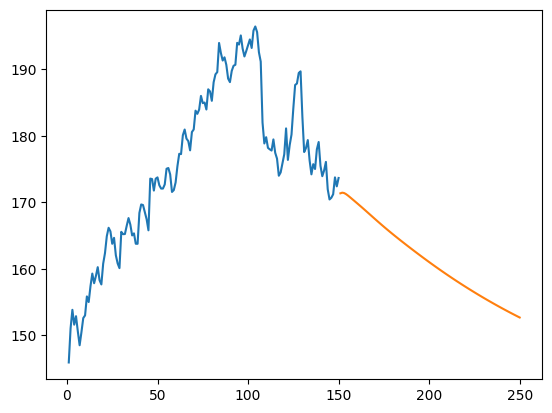

In [ ]:
#plt.plot(day_new,scaler.inverse_transform(df1[1106:]))
#plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.plot(day_new[:150], scaler.inverse_transform(df1[1106:1106+150]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))


*For a smoother graph*

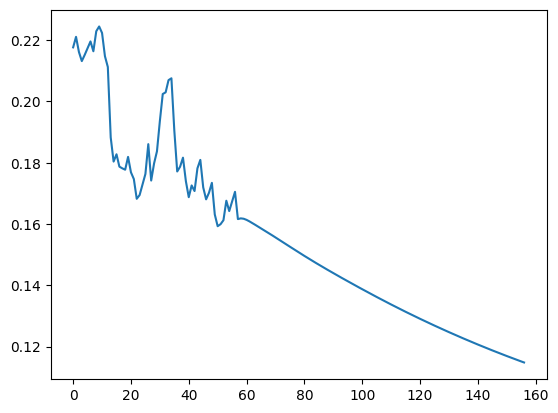

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

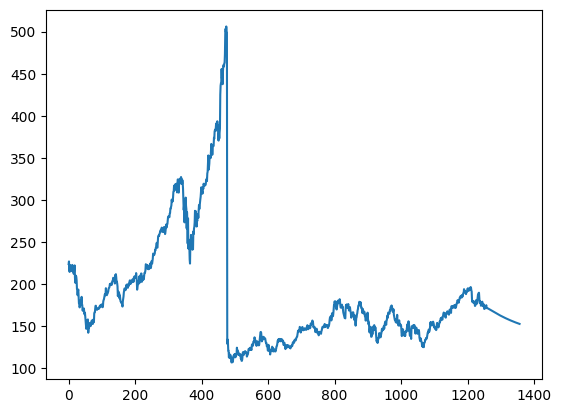

In [ ]:
plt.plot(df3)